In [1]:
from pyforest import *

In [2]:
mall_customers_info = pd.read_csv('Mall_Customers.csv')

In [4]:
mall_customers_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_customers_info.shape

(200, 5)

In [6]:
mall_customers_info.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
mall_customers_info.nunique() # unique values

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

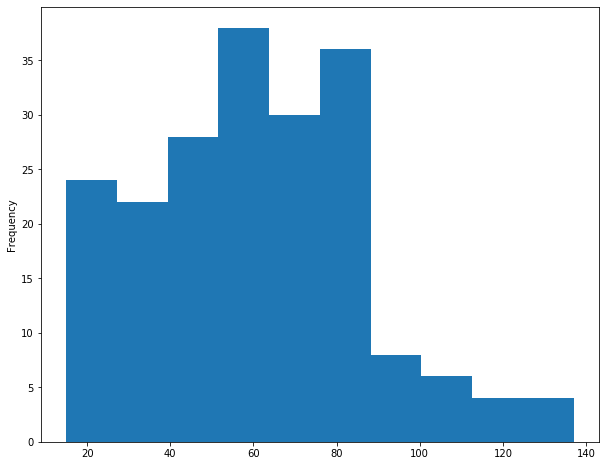

In [10]:
mall_customers_info['Annual Income (k$)'].plot.hist(bins=10, figsize=(10, 8))

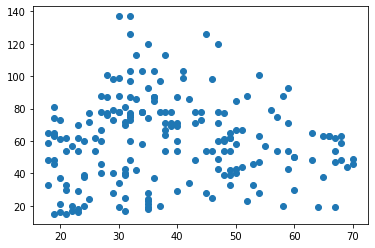

In [11]:
plt.scatter(mall_customers_info['Age'], mall_customers_info['Annual Income (k$)'])

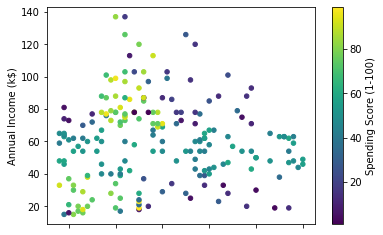

In [12]:
mall_customers_info.plot.scatter(x = 'Age',
                                 y = 'Annual Income (k$)',
                                 c = 'Spending Score (1-100)',
                                 colormap = 'viridis')

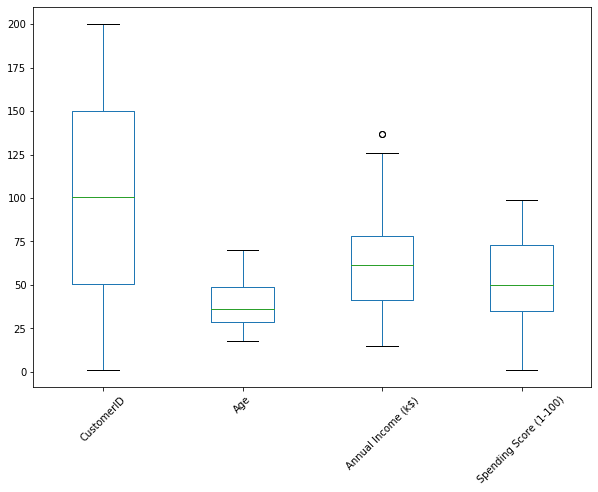

In [13]:
boxplot = mall_customers_info.boxplot(grid = False, rot=45, figsize=(10,7))

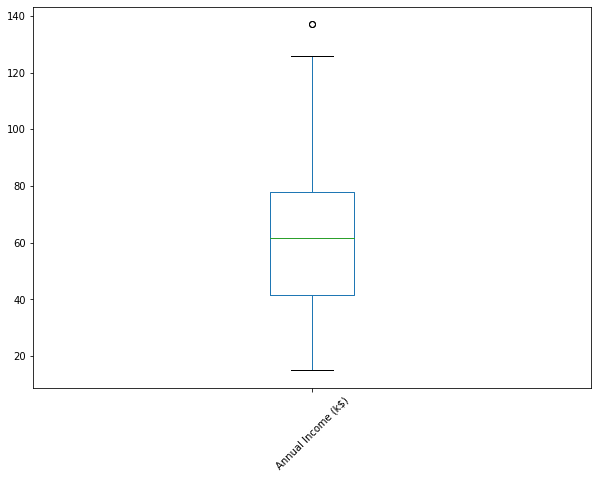

In [14]:
boxplot = mall_customers_info.boxplot(grid = False, rot=45, figsize=(10,7), column = ['Annual Income (k$)'])

In [15]:
# Outliers
mall_customers_info.loc[mall_customers_info['Annual Income (k$)'] > 125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [16]:
Q1 = mall_customers_info['Annual Income (k$)'].quantile(0.25)
Q3 = mall_customers_info['Annual Income (k$)'].quantile(0.75)

print(Q1, Q3)

41.5 78.0


In [18]:
IQR = Q3 - Q1
IQR

36.5

In [19]:
mall_customers_info['Annual Income Outlier'] = False

In [21]:
# Outlier treshold
Q1 + 1.5 * IQR

96.25

In [40]:
for index, row in mall_customers_info.iterrows():
    if row['Annual Income (k$)'] > (Q1 + 1.5 * IQR):
        mall_customers_info.at[index, 'Annual Income Outlier'] = True

In [41]:
# mall_customers_info[mall_customers_info['Annull Income Outlier'] == True]
mall_customers_info[mall_customers_info['Annull Income Outlier'] == True].sum()

CustomerID                                                             3810
Genre                     FemaleFemaleMaleFemaleFemaleMaleFemaleMaleFema...
Age                                                                     732
Annual Income (k$)                                                     2194
Spending Score (1-100)                                                 1040
Annual Income Outlier                                                    20
Annull Income Outlier                                                    20
dtype: object

In [42]:
non_outliers = mall_customers_info.loc[mall_customers_info['Annual Income Outlier'] == False]
non_outliers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income Outlier,Annull Income Outlier
0,1,Male,19,15,39,False,NaN
1,2,Male,21,15,81,False,NaN
2,3,Female,20,16,6,False,NaN
3,4,Female,23,16,77,False,NaN
4,5,Female,31,17,40,False,NaN


In [43]:
mean = non_outliers['Annual Income (k$)'].mean()
mean

55.1

In [44]:
# Fill in the outliers with the mean
for index, row in mall_customers_info.iterrows():
    
    if row['Annual Income Outlier'] == True:
        mall_customers_info.at[index, 'Annual Income (k$)'] = mean

In [45]:
mall_customers_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income Outlier,Annull Income Outlier
0,1,Male,19,15,39,False,NaN
1,2,Male,21,15,81,False,NaN
2,3,Female,20,16,6,False,NaN
3,4,Female,23,16,77,False,NaN
4,5,Female,31,17,40,False,NaN


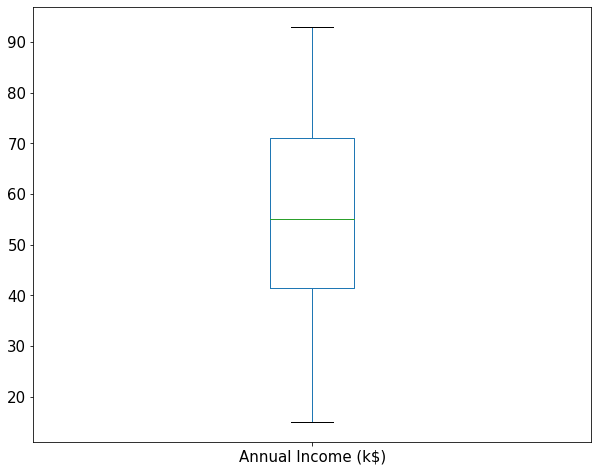

In [46]:
boxplot = mall_customers_info.boxplot(grid = False, fontsize=15, column='Annual Income (k$)', figsize=(10,8))